# The perceptron algorithm

In memory of the good old times we implement the perceptron algorithm by repeatedly applying the perceptron trick

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Something for the eyes
sns.set()
sns.set_style("white")

# Destroy the ignorance of the free will
np.random.seed(42)

# First we load our data
data = pd.read_csv('data.csv', header=None, names=['x1', 'x2', 'y'])

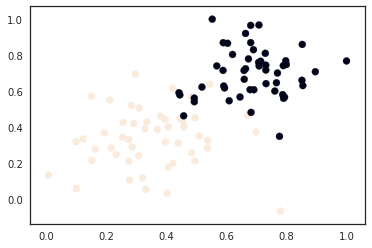

In [29]:
# And now we have a look at the target classes
plt.scatter(data.x1, data.x2, c=data.y)
plt.show()

In [116]:
def trainAlgorithm(X, y, learn_rate = 0.01, num_epochs = 30):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        # For each iteration we apply a perceptron step
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [117]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [118]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [119]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [120]:
# Separate dependent and independent variables
X = data.iloc[:, :2]
y = data.iloc[:, 2]

In [131]:
boundaries = trainAlgorithm(X.as_matrix(), y.as_matrix())

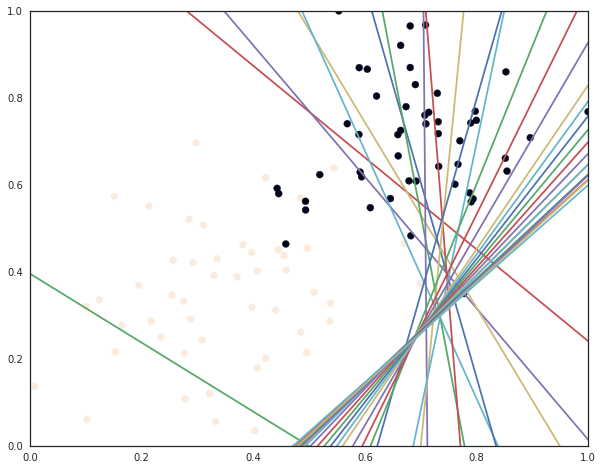

In [132]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(data.x1, data.x2, c=data.y)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
#lt.plot(boundaries)
for b in boundaries:
    plt.plot(b)
plt.show()